# Train simple baseline models merged seasons (full) data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from src.features.data_engineering import preprocess_merged_seasons, reverse_processing

In [5]:
(x_train, y_train), (x_test, y_test), (x_train_target, x_test_target), x_scaler = preprocess_merged_seasons()

## Train on baseline Dummy model

In [6]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

In [7]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(x_train, y_train)

DummyRegressor()

In [8]:
y_pred = dummy_regr.predict(x_test)

In [9]:
mean_squared_error(y_pred, y_test)

6.2045750740819905

## Train on baseline decision tree model

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
tree_regr = DecisionTreeRegressor()
tree_regr.fit(x_train, y_train)

DecisionTreeRegressor()

In [12]:
y_pred = tree_regr.predict(x_test)

In [13]:
mean_squared_error(y_pred, y_test)

9.380201062038857

Feature 0: assists, Score: 0.00302
Feature 1: bonus, Score: 0.00447
Feature 2: bps, Score: 0.03975
Feature 3: clean_sheets, Score: 0.0028
Feature 4: creativity, Score: 0.05644
Feature 5: goals_conceded, Score: 0.01642
Feature 6: goals_scored, Score: 0.00161
Feature 7: ict_index, Score: 0.04305
Feature 8: influence, Score: 0.04971
Feature 9: minutes, Score: 0.23814
Feature 10: own_goals, Score: 0.00045
Feature 11: penalties_missed, Score: 0.00057
Feature 12: penalties_saved, Score: 0.00019
Feature 13: red_cards, Score: 0.00044
Feature 14: saves, Score: 0.00179
Feature 15: selected, Score: 0.13173
Feature 16: threat, Score: 0.03517
Feature 17: total_points, Score: 0.01597
Feature 18: transfers_balance, Score: 0.07465
Feature 19: transfers_in, Score: 0.09323
Feature 20: transfers_out, Score: 0.08391
Feature 21: value, Score: 0.07245
Feature 22: was_home, Score: 0.01151
Feature 23: yellow_cards, Score: 0.00407
Feature 24: position_DEF, Score: 0.00663
Feature 25: position_FWD, Score: 0.0033

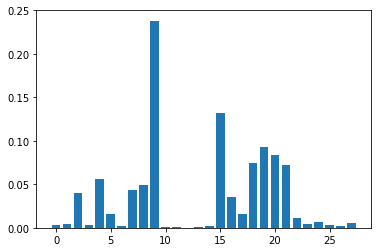

In [14]:
# summarize feature importance
importance = tree_regr.feature_importances_
for i,v in enumerate(importance):
    print(f'Feature {i}: {x_train.columns[i]}, Score: {round(v,5)}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Train on baseline SVR model

In [15]:
from sklearn.svm import LinearSVR

For single season data at first I used SVR as the model, but because of it's time complexity for bigger data, now I use LinearSVR.

In [16]:
model_svr = LinearSVR()
model_svr.fit(x_train, y_train)

d:\studies\informatyka\semestr_3\fpl_ai_manager\venv\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR()

In [17]:
# create series to keep indexes and name same as in the original y data
y_pred_2021 = pd.Series(model_svr.predict(x_test), index=y_test.index, name='predicted_total_points_next_gameweek')

In [18]:
mean_squared_error(y_pred_2021, y_test)

5.209431930050453

## Merge results with footballers extracted target data

In [19]:
x_test_reversed = reverse_processing(x_test, x_scaler, x_test_target)

In [20]:
x_test_reversed_svr = pd.concat([y_pred_2021, x_test_reversed], axis=1)

In [23]:
#preview x_test_reversed sorted by predicted total points descending
x_test_reversed_svr.sort_values(by='predicted_total_points_next_gameweek', ascending=False).head(10)

,predicted_total_points_next_gameweek,name,GW,element,total_points_next_gameweek,season,assists,bonus,bps,clean_sheets,...,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,position_DEF,position_FWD,position_GK,position_MID
95003,3.225766,Bruno Miguel Borges Fernandes,9,302,10.0,2020-21,0.0,3.0,44.0,1.0,...,1033358.0,1055501.0,22143.0,107.0,1.0,0.0,0.0,0.0,0.0,1.0
124386,3.143495,Bernardo Mota Veiga de Carvalho e Silva,16,261,1.0,2021-22,1.0,0.0,17.0,1.0,...,983926.0,993639.0,9713.0,76.0,1.0,0.0,0.0,0.0,0.0,1.0
92785,2.924833,Harry Kane,5,388,5.0,2020-21,1.0,3.0,69.0,0.0,...,723621.0,769600.0,45979.0,106.0,1.0,0.0,0.0,1.0,0.0,0.0
70011,2.899406,Teemu_Pukki_278,4,278,12.0,2019-20,0.0,0.0,5.0,0.0,...,984950.0,1013156.0,28206.0,70.0,0.0,0.0,0.0,1.0,0.0,0.0
93416,2.861371,Heung-Min Son,6,390,2.0,2020-21,0.0,3.0,30.0,1.0,...,746754.0,764606.0,17852.0,94.0,0.0,0.0,0.0,0.0,0.0,1.0
92826,2.852597,James RodrÃ­guez,5,508,2.0,2020-21,1.0,0.0,22.0,0.0,...,735240.0,817940.0,82700.0,79.0,1.0,1.0,0.0,0.0,0.0,1.0
56967,2.845919,Paul_Pogba_302,20,302,3.0,2018-19,1.0,3.0,66.0,0.0,...,420835.0,427541.0,6706.0,81.0,1.0,0.0,0.0,0.0,0.0,1.0
116779,2.841192,Demarai Gray,4,484,2.0,2021-22,0.0,0.0,25.0,0.0,...,614701.0,802662.0,187961.0,56.0,1.0,0.0,0.0,0.0,0.0,1.0
117598,2.834723,Romelu Lukaku,5,529,2.0,2021-22,0.0,0.0,11.0,1.0,...,686333.0,788504.0,102171.0,116.0,0.0,0.0,0.0,1.0,0.0,0.0
101534,2.809059,Raheem Sterling,20,276,0.0,2020-21,1.0,0.0,38.0,1.0,...,417851.0,452070.0,34219.0,115.0,0.0,0.0,0.0,0.0,0.0,1.0


## Train on baseline Multi-layer Perceptron model

In [25]:
import tensorflow as tf

In [26]:
model_mlp = tf.keras.models.Sequential()

model_mlp.add(tf.keras.layers.Dense(units=32, activation='relu', input_shape=(x_train.shape[1],)))
model_mlp.add(tf.keras.layers.Dense(units=16, activation='relu'))
model_mlp.add(tf.keras.layers.Dense(units=1, activation='linear'))


In [27]:
model_mlp.compile(optimizer='adam',
                  loss='mse')

In [28]:
history = model_mlp.fit(x_train, y_train,
                        batch_size=16,
                        epochs=30,
                        validation_split=0.2)

Epoch 1/30
5182/5182 [==============================] - 4s 793us/step - loss: 4.6529 - val_loss: 4.7341
Epoch 2/30
5182/5182 [==============================] - 4s 705us/step - loss: 4.5508 - val_loss: 4.7211
Epoch 3/30
5182/5182 [==============================] - 4s 763us/step - loss: 4.5383 - val_loss: 4.7035
Epoch 4/30
5182/5182 [==============================] - 4s 743us/step - loss: 4.5289 - val_loss: 4.7000
Epoch 5/30
5182/5182 [==============================] - 4s 734us/step - loss: 4.5199 - val_loss: 4.7541
Epoch 6/30
5182/5182 [==============================] - 4s 710us/step - loss: 4.5124 - val_loss: 4.6930
Epoch 7/30
5182/5182 [==============================] - 4s 688us/step - loss: 4.5089 - val_loss: 4.6944
Epoch 8/30
5182/5182 [==============================] - 4s 826us/step - loss: 4.5065 - val_loss: 4.6871
Epoch 9/30
5182/5182 [==============================] - 4s 786us/step - loss: 4.5042 - val_loss: 4.6779
Epoch 10/30
5182/5182 [==============================] - 4s 761u

In [29]:
score = model_mlp.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score)

Test loss: 4.492274761199951


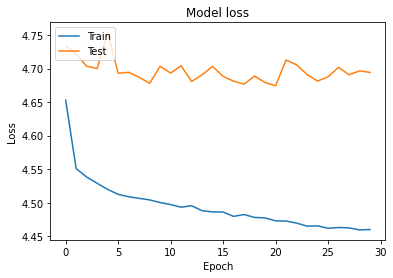

In [30]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [31]:
y_pred_2021_mlp = pd.Series(model_mlp.predict(x_test).reshape(-1,), index=y_test.index, name='predicted_total_points_next_gameweek')

In [32]:
x_test_reversed_mlp = pd.concat([y_pred_2021_mlp, x_test_reversed], axis=1)
#preview x_test_reversed sorted by predicted total points descending
x_test_reversed_mlp.sort_values(by='predicted_total_points_next_gameweek', ascending=False).head(10)

,predicted_total_points_next_gameweek,name,GW,element,total_points_next_gameweek,season,assists,bonus,bps,clean_sheets,...,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,position_DEF,position_FWD,position_GK,position_MID
69898,7.501763,Mohamed_Salah_191,4,191,9.0,2019-20,1.0,0.0,15.0,1.0,...,243530.0,291554.0,48024.0,125.0,0.0,0.0,0.0,0.0,0.0,1.0
99247,7.399347,Mohamed Salah,16,254,2.0,2020-21,0.0,0.0,-5.0,1.0,...,79807.0,108826.0,29019.0,126.0,0.0,0.0,0.0,0.0,0.0,1.0
59869,7.382651,Mohamed_Salah_253,25,253,8.0,2018-19,0.0,0.0,-2.0,0.0,...,-18495.0,36357.0,54852.0,136.0,0.0,0.0,0.0,0.0,0.0,1.0
99759,7.018317,Mohamed Salah,17,254,3.0,2020-21,0.0,0.0,-1.0,0.0,...,12437.0,87003.0,74566.0,126.0,0.0,0.0,0.0,0.0,0.0,1.0
102240,6.833116,Bruno Miguel Borges Fernandes,21,302,17.0,2020-21,0.0,0.0,8.0,1.0,...,-57421.0,75425.0,132846.0,114.0,0.0,0.0,0.0,0.0,0.0,1.0
49716,6.576674,Mohamed_Salah_253,7,253,3.0,2018-19,0.0,0.0,8.0,0.0,...,-106042.0,22128.0,128170.0,129.0,0.0,0.0,0.0,0.0,0.0,1.0
47568,6.564017,Mohamed_Salah_253,3,253,2.0,2018-19,0.0,0.0,28.0,1.0,...,5370.0,80831.0,75461.0,130.0,1.0,0.0,0.0,0.0,0.0,1.0
83427,6.521564,Mohamed_Salah_191,28,191,9.0,2019-20,0.0,0.0,5.0,0.0,...,23476.0,57735.0,34259.0,128.0,0.0,0.0,0.0,0.0,0.0,1.0
53082,6.473922,Sadio_Mané_251,13,251,3.0,2018-19,2.0,0.0,20.0,1.0,...,-56036.0,48051.0,104087.0,99.0,0.0,0.0,0.0,0.0,0.0,1.0
101534,6.469264,Raheem Sterling,20,276,0.0,2020-21,1.0,0.0,38.0,1.0,...,417851.0,452070.0,34219.0,115.0,0.0,0.0,0.0,0.0,0.0,1.0


### Train bigger MLP model

In [24]:
model_mlp_2 = tf.keras.models.Sequential()

model_mlp_2.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(x_train.shape[1],)))
model_mlp_2.add(tf.keras.layers.Dense(units=256, activation='relu'))
model_mlp_2.add(tf.keras.layers.Dense(units=256, activation='relu'))
model_mlp_2.add(tf.keras.layers.Dense(units=126, activation='relu'))
model_mlp_2.add(tf.keras.layers.Dense(units=64, activation='relu'))
model_mlp_2.add(tf.keras.layers.Dense(units=1, activation='linear'))


In [25]:
model_mlp_2.compile(optimizer='adam',
                  loss='mse')

In [26]:
history_2 = model_mlp_2.fit(x_train, y_train,
                        batch_size=16,
                        epochs=30,
                        validation_split=0.2)

Epoch 1/30
5182/5182 [==============================] - 7s 1ms/step - loss: 4.6549 - val_loss: 4.7504
Epoch 2/30
5182/5182 [==============================] - 6s 1ms/step - loss: 4.5754 - val_loss: 4.9314
Epoch 3/30
5182/5182 [==============================] - 6s 1ms/step - loss: 4.5504 - val_loss: 4.7259
Epoch 4/30
5182/5182 [==============================] - 6s 1ms/step - loss: 4.5355 - val_loss: 4.6871
Epoch 5/30
5182/5182 [==============================] - 7s 1ms/step - loss: 4.5324 - val_loss: 4.7704
Epoch 6/30
5182/5182 [==============================] - 6s 1ms/step - loss: 4.5208 - val_loss: 4.7230
Epoch 7/30
5182/5182 [==============================] - 6s 1ms/step - loss: 4.5170 - val_loss: 4.6944
Epoch 8/30
5182/5182 [==============================] - 6s 1ms/step - loss: 4.5157 - val_loss: 4.6902
Epoch 9/30
5182/5182 [==============================] - 6s 1ms/step - loss: 4.5034 - val_loss: 4.6753
Epoch 10/30
5182/5182 [==============================] - 6s 1ms/step - loss: 4.504

In [27]:
score_2 = model_mlp_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_2)

Test loss: 4.473681926727295


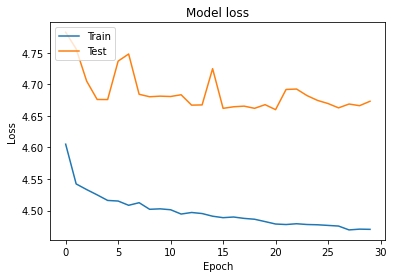

In [28]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()